Study of Machine Learning Libraries and tools in Python


In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn opencv-python tensorflow


In [ ]:
import sys
import numpy as np
import time

lis = list(range(20,75))
arr = np.arange(20,75)
sys.getsizeof(25)*len(lis)
arr.itemsize* arr.size

lis1 = list(range(1000000))
lis2 = list(range(1000000))
stime = time.time()
result = [(x+y) for x, y in zip(lis1, lis2)]
etime = time.time()
print(etime - stime)

arr1 = np.arange(1000000)
arr2 = np.arange(1000000)
stime = time.time()
result = arr1 + arr2
etime = time.time()
print(etime - stime)



0.06961321830749512
0.015621662139892578


In [ ]:
import tensorflow as tf
g = tf.Graph()
with g.as_default():
   a = tf.constant([1.0], name = "a")
   b = tf.constant([2.0], name = "b")
   c = tf.add(a, b, name="addition")

print(c)

with tf.compat.v1.Session(graph=g) as sess:
  result = sess.run(c)
  print(result)

Tensor("addition:0", shape=(1,), dtype=float32)
[3.]


In [ ]:
t = tf.Graph()
x = 2
y = 2
with t.as_default():
  op1 = tf.add(x,y)
  op2 = tf.multiply (x,y)
  op3 = tf.pow(op2, op1)
  print(op3)

with tf.compat.v1.Session(graph = t) as sess:
  result = sess.run(op3)
print(op3)
print(result)

Tensor("Pow:0", shape=(), dtype=int32)
Tensor("Pow:0", shape=(), dtype=int32)
256


o

Experiment 2 : Make Dummy predictions and evaluate the predictions using different metrics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       138
           1       1.00      0.61      0.75       165

    accuracy                           0.79       303
 

0.7854785478547854

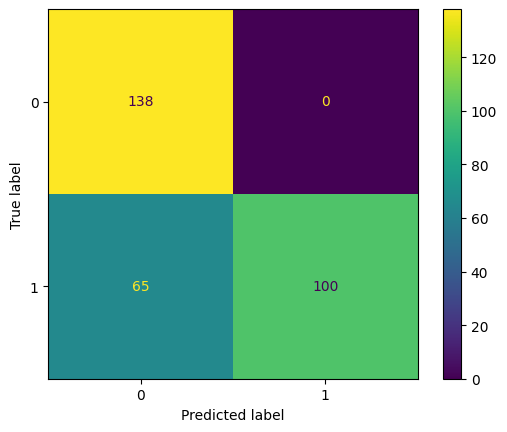

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/heart.csv')
df.head()
df.shape
df.isnull().sum()
df.count()
df.info()
df.dtypes
(df == 0).sum()
np.mean(df['age'])
df.age.mean()


df.columns
data = df[['age', 'sex', 'cp', 'trestbps', 'chol']]
train, test = train_test_split(data, test_size=0.25, random_state=1)
train.shape
test.shape
predicted = np.concatenate((np.ones(100), np.zeros(len(df) - 100)))
predicted = predicted[:len(df)]
type(predicted)
actual = df['target'].values
ConfusionMatrixDisplay.from_predictions(actual,predicted)

print(classification_report(actual, predicted))
accuracy_score(actual, predicted)

Experiment 3: Regression Analysis

1
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64


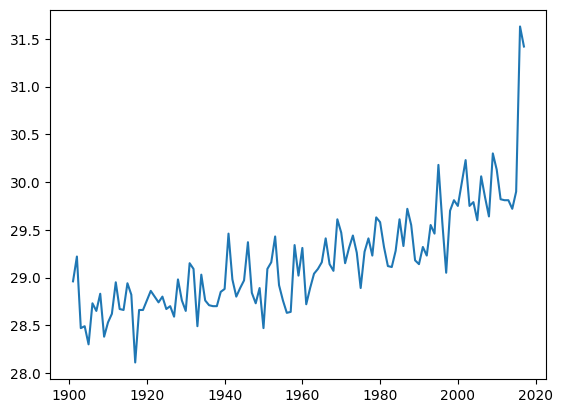

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("/content/temperatures.csv")
df = data
data.describe()
data.head()
data.tail()
type(data)
data.shape
data.info
count = (data["JAN"] == 22).sum()
print(count)
column = data
count = column[column==0].count()
print(count)
data.isnull().sum()
data.isnull().head()
data.info()

x = data['YEAR']
y = data['ANNUAL']
plt.plot(x,y)

 x Training data set: (87, 1)
 x Testing data set: (30, 1)
 y Training data set: (87,)
 y Testing data set: (30,)


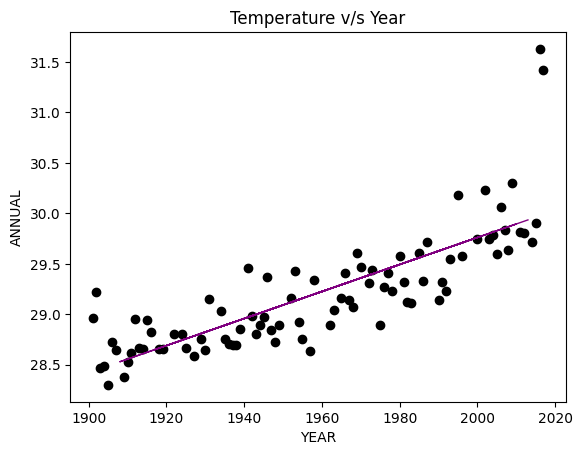

In [ ]:
from sklearn.linear_model import LinearRegression

x.shape
x = x.reshape(117,1)
x.shape
type(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(f" x Training data set: {x_train.shape}")
print(f" x Testing data set: {x_test.shape}")
print(f" y Training data set: {y_train.shape}")
print(f" y Testing data set: {y_test.shape}")
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_
model.intercept_
y_pred = model.predict(x_test)
y_pred.shape

plt.scatter(x_train, y_train, color="black")
plt.plot(x_test, y_pred, color="purple", linewidth = 1)
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.title("Temperature v/s Year")
plt.show()


Mean Squared Error: 0.08874228315629028
MAE : 0.23422779731725107
R2 Score : 0.5995105212373844


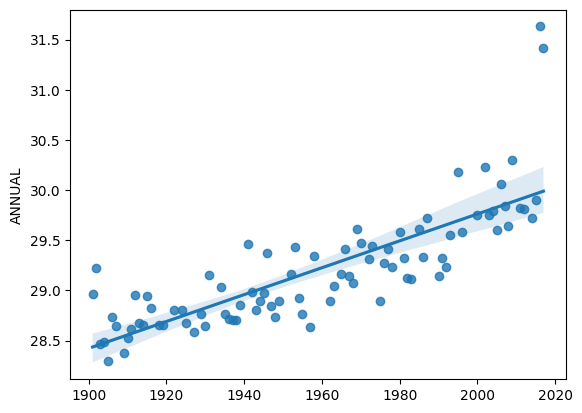

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
sns. regplot(x = x_train, y = y_train, data = df)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")

Experiment 4 : Support Vector Machines

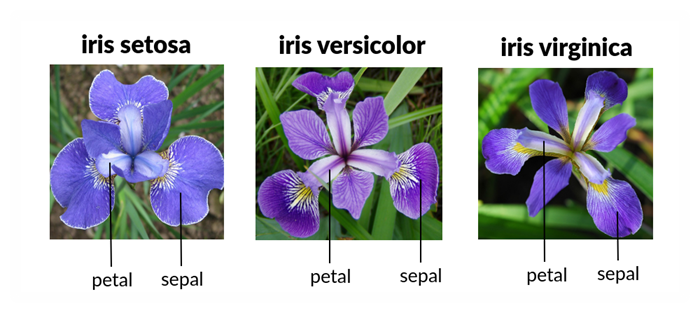

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import pandas as pd
from matplotlib import pyplot as plot
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

image = cv2.imread("/content/irisflower.png")
cv2_imshow(image)

df = pd.read_csv('/content/Iris.csv')
df


In [ ]:
x = df.iloc[:, 0:5]
y = df.iloc[:, 5]
y


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
len(x_train)
len(x_test)


30

In [ ]:

model = SVC(kernel = 'linear')
model.fit(x_train, y_train)
model.predict(x_test)
x_test


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,56,5.7,2.8,4.5,1.3
147,148,6.5,3.0,5.2,2.0
30,31,4.8,3.1,1.6,0.2
8,9,4.4,2.9,1.4,0.2
20,21,5.4,3.4,1.7,0.2
115,116,6.4,3.2,5.3,2.3
35,36,5.0,3.2,1.2,0.2
144,145,6.7,3.3,5.7,2.5
100,101,6.3,3.3,6.0,2.5
132,133,6.4,2.8,5.6,2.2


In [ ]:
model.score(x_test, y_test)

1.0

Experiment 7: K-Means clustering

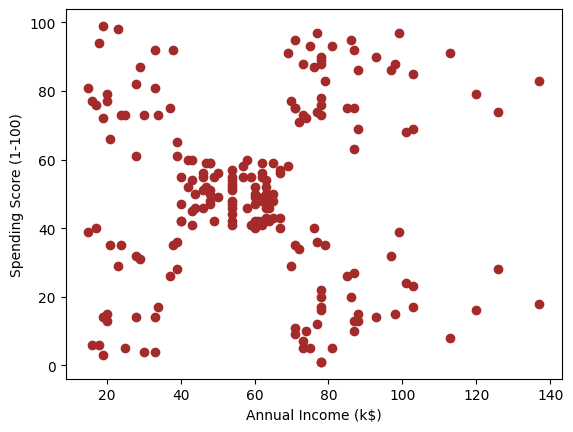

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Mall_Customers.csv')
x = df.iloc[:, 3:]
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], color='brown')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

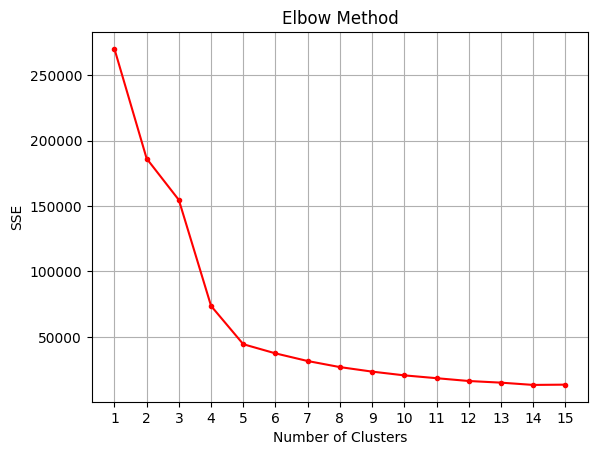

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6)
x.shape
km.fit_predict(x)
km.inertia_

SSE = []
for i in range(1,16):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  SSE.append(km.inertia_)

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), SSE, marker='.', color='red')

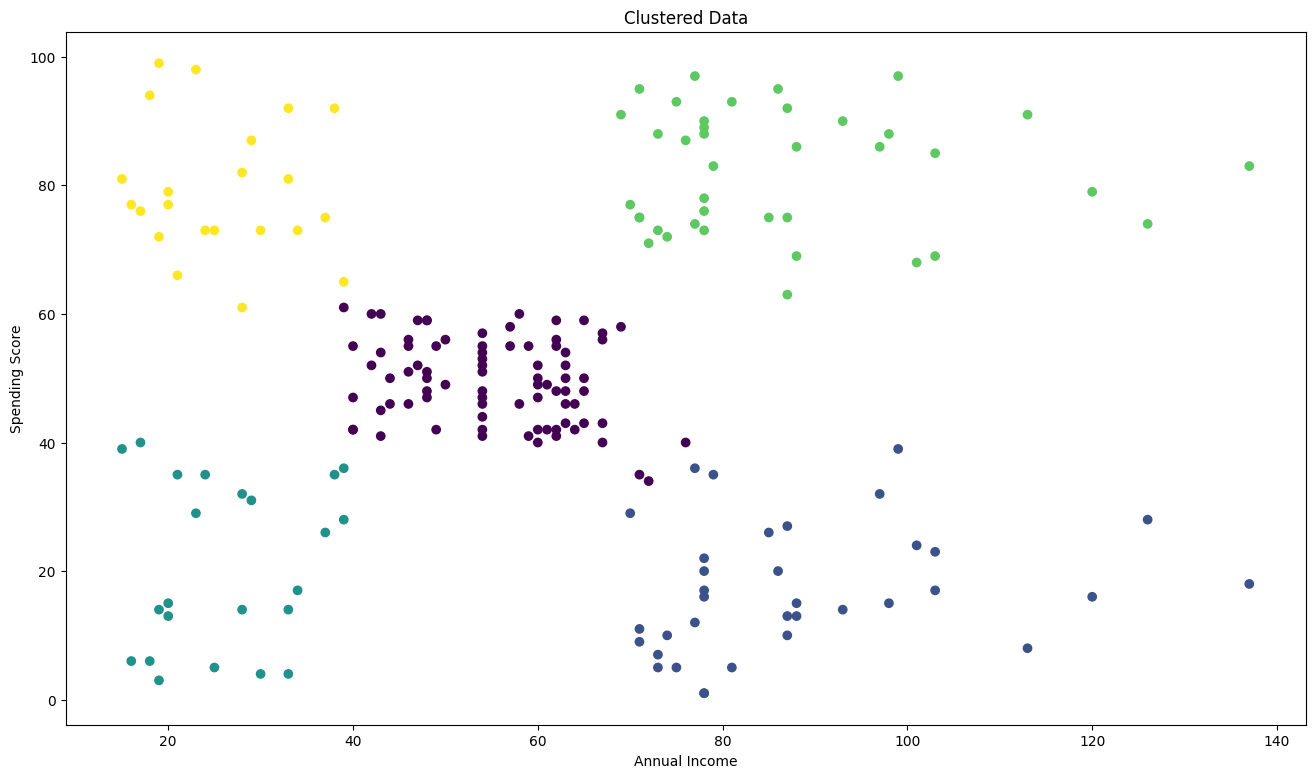

In [ ]:
km = KMeans(n_clusters= 5, random_state=2)
labels = km.fit_predict(x)
km.labels_
plt.figure(figsize=(16,9))
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = labels)

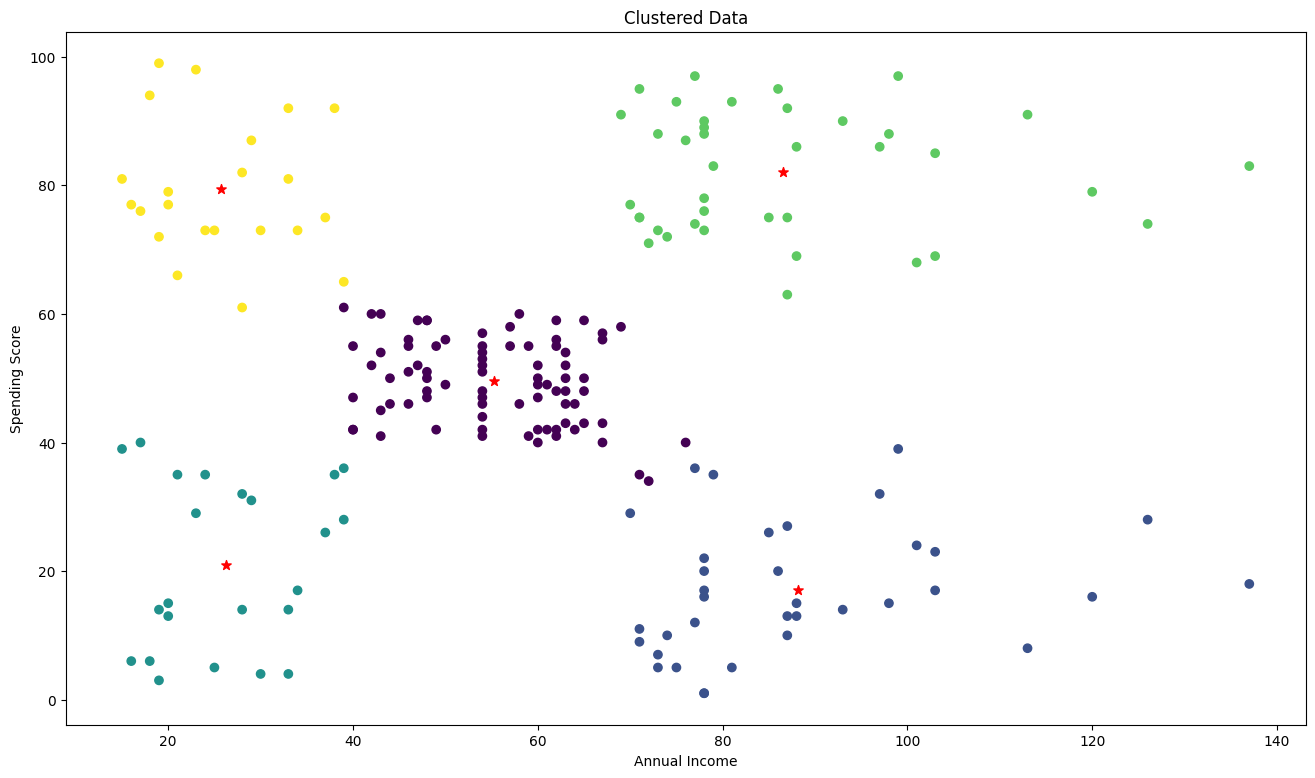

In [ ]:
cent = km.cluster_centers_
plt.figure(figsize=(16,9))
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = labels)
plt.scatter(cent[:,0], cent[:,1], s = 50, color = 'red', marker='*')

Experiment 6 : Customer Segmentation

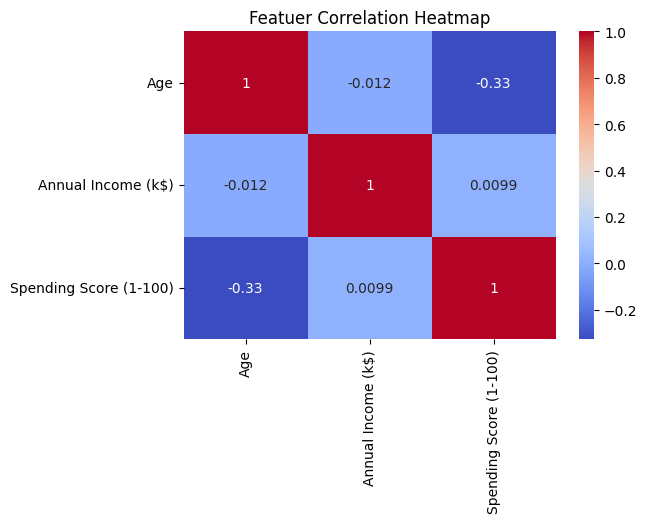

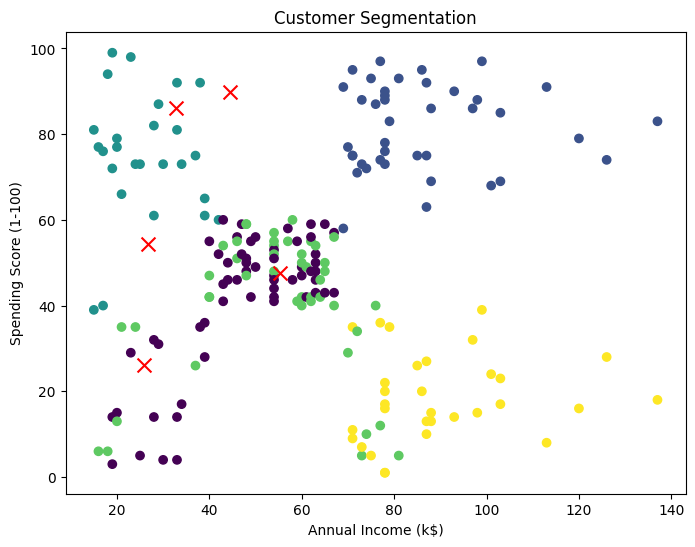

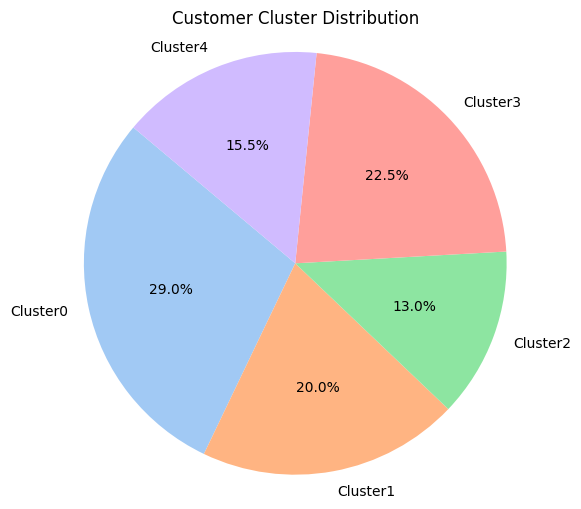

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Mall_Customers.csv')
df = df.drop(['CustomerID', 'Gender'], axis=1)

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Featuer Correlation Heatmap')
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

km = KMeans(n_clusters=5, random_state=42)
labels = km.fit_predict(scaled_data)
df['Cluster'] = labels

plt.figure(figsize = (8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['Cluster'], cmap='viridis')
plt.scatter(km.cluster_centers_[:,0] * scaler.scale_[0] + scaler.mean_[0],
           km.cluster_centers_[:,1] * scaler.scale_[1] + scaler.mean_[1],
           color='red', marker='x', s = 100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize = (6,6))
plt.pie(cluster_counts, labels=[f'Cluster{i}' for i in cluster_counts.index], autopct='%1.1f%%', startangle=140, colors = sns.color_palette("pastel"))
plt.title("Customer Cluster Distribution")
plt.axis('equal')
plt.show()

Experiment 7 : Hebbian Learning Rule

In [6]:
# Hebbian learning for AND gate

# Bipolar Inputs and Targets
inputs = [[-1, -1],
          [-1,  1],
          [ 1, -1],
          [ 1,  1]]

targets = [-1, -1, -1, 1]  # AND output in bipolar form

# Initialize weights and bias
w = [0, 0]
b = 0

# Hebbian Learning Rule
for i in range(4):
    x = inputs[i]
    t = targets[i]
    w[0] += x[0] * t
    w[1] += x[1] * t
    b += t

# Display weights and bias
print("Trained weights:", w)
print("Trained bias:", b)

# Testing
print("\nTesting Hebbian Network:")
for i in range(4):
    x = inputs[i]
    y_in = w[0]*x[0] + w[1]*x[1] + b
    y = 1 if y_in > 0 else -1
    print(f"Input: {x}, Output: {y}")

Trained weights: [2, 2]
Trained bias: -2

Testing Hebbian Network:
Input: [-1, -1], Output: -1
Input: [-1, 1], Output: -1
Input: [1, -1], Output: -1
Input: [1, 1], Output: 1


Experiment 8 : Expectation Maximisation Algorithm

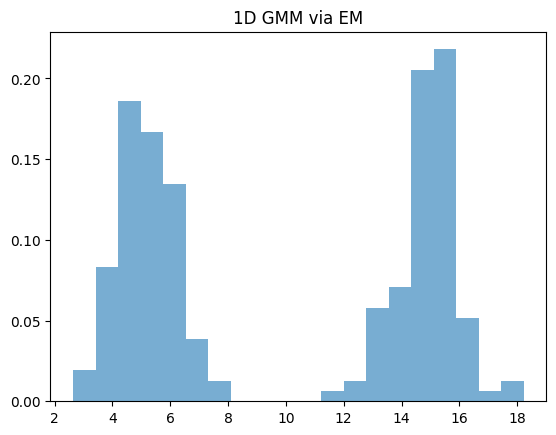

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = np.concatenate([np.random.normal(5, 1, 100), np.random.normal(15,1,100)])

mean1 , mean2 = 4, 16
var1, var2 = 1,1
w1, w2 = 0.5, 0.5

for _ in range(10):
  p1 = w1 * (1/np.sqrt(2*np.pi*var1)) * np.exp(-0.5 * ((data - mean1)**2 / var1))
  p2 = w2 * (1/np.sqrt(2*np.pi*var2)) * np.exp(-0.5 * ((data - mean2)**2 / var2))
  r1 = p1 / (p1+p2)
  r2 = 1 - r1
  w1, w2 = r1.mean(), r2.mean()
  mean1, mean2 = (r1 * data).sum() / r1.sum() , (r2 * data).sum() / r2.sum()
  var1 = ((r1 * (data - mean1)**2).sum()) / r1.sum()
  var2 = ((r2 * (data - mean2)**2).sum()) / r2.sum()

plt.hist(data, bins = 20, density = True, alpha = 0.6)
plt.title("1D GMM via EM")
plt.show()